In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для 

In [ ]:
# 1. Получите данные и загрузите их в рабочую среду 
df_ad = pd.read_csv('/content/adult.csv')
df_ad.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# 2.Проведите первичный анализ.
# 2.а. Проверьте данные на пропуски
# df_ad.info()
df_ad.isna().sum()
# пропусков не обнаружено

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df_ad.shape

(48842, 15)

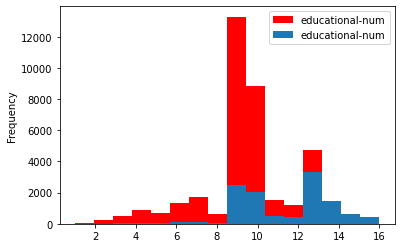

In [ ]:
# 2.b. Постройте 1-2 графика на выбор. 
# Визуализация должна быть основана на исследуемых данных
#  и быть полезной (из графика можно сделать вывод 
# об особенностях датасета/класса/признака)
df_ad_1 = df_ad[df_ad['income'] == '>50K']
df_ad_0 = df_ad[df_ad['income'] == '<=50K']

df_ad_0['educational-num'].plot.hist(bins=len(df_ad_0['educational-num'].unique()), color='red') 
df_ad_1['educational-num'].plot.hist(bins=len(df_ad_0['educational-num'].unique()))
plt.legend()
plt.show()

уровень образования не влияет на доход
вне зависимости от образования доход больше 50 К встречается намного реже

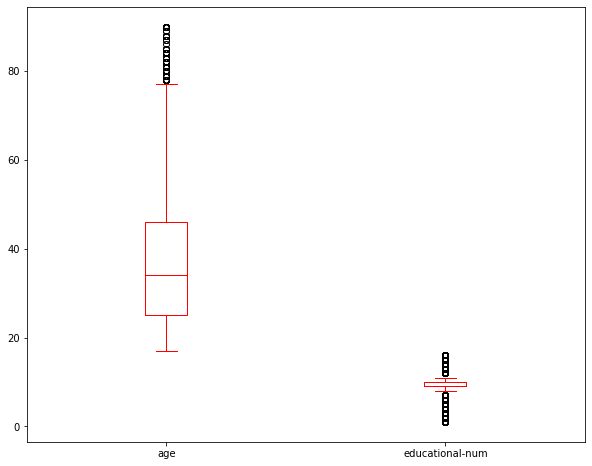

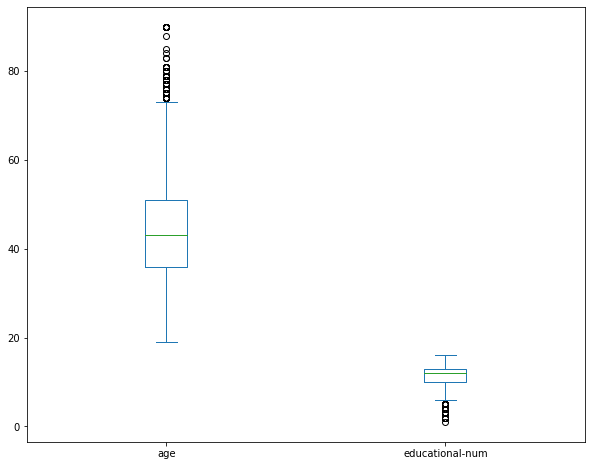

In [ ]:
# df.plot(subplots=True, layout=(1,2))
# df_ad.plot(subplots = True, figsize=(22,18));
df_ad_0.plot(x='income', y = ['age','educational-num'],figsize=(10,8), kind='box',color='red');

df_ad_1.plot(x='income', y = ['age','educational-num'],figsize=(10,8), kind='box');


тут можно сказать, что больше получают люди повзрослее. больше 40 лет в среднем 

на примере меньшего заработка


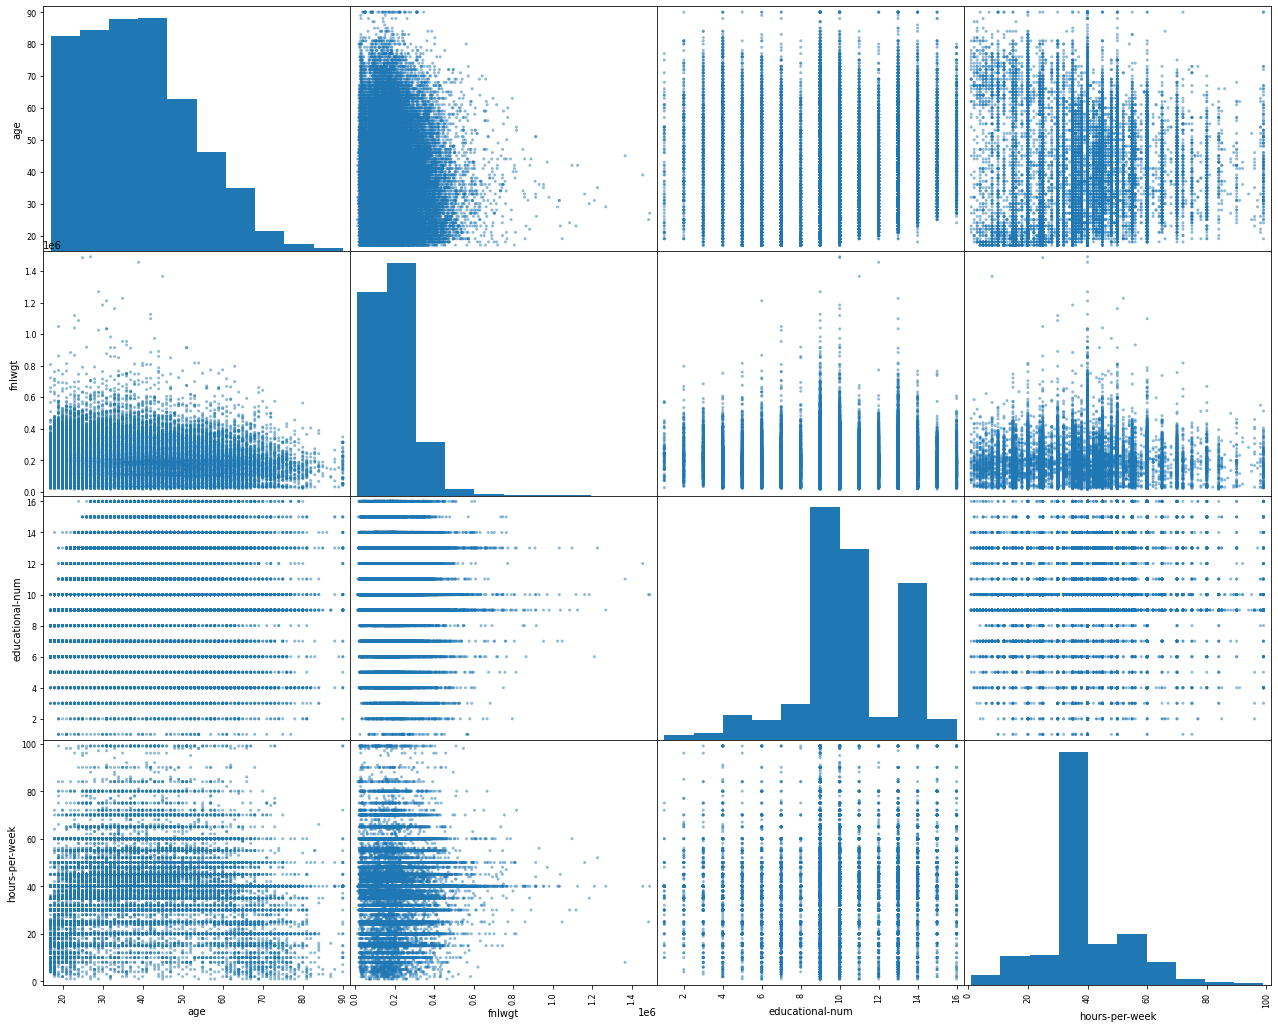

In [ ]:
sp_num = ['age', 'fnlwgt','educational-num','hours-per-week']
pd.plotting.scatter_matrix(df_ad.loc[:, sp_num],figsize=(22,18),diagonal='hist');

кореляции между числовыми параметрами не наблюдается
что тут можно ещё сказать, даже не знаю =(

In [ ]:
# 2.c. Преобразуйте категориальные признаки.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_ad['income'])
y = pd.Series(data = le.transform(df_ad['income']))

y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
le_g = LabelEncoder()
le_g.fit(df_ad['gender'])
df_ad['gender'] = pd.Series(data = le_g.transform(df_ad['gender']))
le_ed = LabelEncoder()
le_ed.fit(df_ad['education'])
df_ad['education'] = pd.Series(data = le_ed.transform(df_ad['education']))

le_wc = LabelEncoder()
le_wc.fit(df_ad['workclass'])
df_ad['workclass'] = pd.Series(data = le_wc.transform(df_ad['workclass']))

le_marstat = LabelEncoder()
le_marstat.fit(df_ad['marital-status'])
df_ad['marital-status'] = pd.Series(data = le_marstat.transform(df_ad['marital-status']))

le_occ = LabelEncoder()
le_occ.fit(df_ad['occupation'])
df_ad['occupation'] = pd.Series(data = le_occ.transform(df_ad['occupation']))

le_relship = LabelEncoder()
le_relship.fit(df_ad['relationship'])
df_ad['relationship'] = pd.Series(data = le_relship.transform(df_ad['relationship']))
le_race = LabelEncoder()
le_race.fit(df_ad['race'])
df_ad['race'] = pd.Series(data = le_race.transform(df_ad['race']))
le_nat_c = LabelEncoder()
le_nat_c.fit(df_ad['native-country'])
df_ad['native-country'] = pd.Series(data = le_nat_c.transform(df_ad['native-country']))
df_ad.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,>50K
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,<=50K


In [ ]:
# замена признаков через pd.get_dummies
selected_col = ['gender', 'education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df_ad_dum = pd.get_dummies(df_ad, columns = selected_col, drop_first = True)
df_ad_dum.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,gender_Male,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_ad.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
X = df_ad_dum.copy()
del X['income']
# df_ad.head()
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_Male,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(48842, 100)

In [ ]:
# Разделите выборку на обучающее и тестовое подмножество. 
# 80% данных оставить на обучающее множество, 20% на тестовое.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
, StandardScaler
# Обучите модели логистической регрессии 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# и опорных векторов на обучающем множестве. 
from sklearn.svm import SVC
# model_logistic = LogisticRegression()
model_logistic = make_pipeline(StandardScaler(),LogisticRegression())
model_svc = make_pipeline(StandardScaler(),SVC())

model_logistic.fit(X_train,y_train)
model_svc.fit(X_train, y_train)
pred_log = model_logistic.predict(X_test)
# model_logistic.predict_proba(X_test)

pred_svc = model_svc.predict(X_test)
# model_svc.predict_proba(X_test)


print('точность на тренировочной')
s_log = model_logistic.score(X_train, y_train)
s_svc = model_svc.score(X_train, y_train)
print(f'train (s_log : s_svc) = {s_log} : {s_svc}')

print('точность на тестовой')
s_log = model_logistic.score(X_test, y_test)
s_svc = model_svc.score(X_test, y_test)
print(f'test (s_log : s_svc) = {s_log} : {s_svc}')
print('на всей')
s_log = model_logistic.score(X, y)
s_svc = model_svc.score(X, y)
print(f'test (s_log : s_svc) = {s_log} : {s_svc}')

точность на тренировочной
train (s_log : s_svc) = 0.8529163360888593 : 0.8619507076497838
точность на тестовой
test (s_log : s_svc) = 0.8573037158358071 : 0.8558706111167981
на всей
test (s_log : s_svc) = 0.8537938659350559 : 0.8607346136521846


c LabelEncoder() по всем параметрам, кроме income:
-на всей
0,825 : 085506

до маштабирования:

- точность на тренировочной

train (s_log : s_svc) = 0.7868348987792082 : 0.7969185882834694

- точность на тестовой

test (s_log : s_svc) = 0.7925069096120381 : 0.8035622888729655

- на всей

test (s_log : s_svc) = 0.7879693706236436 : 0.7982474100159699

После масштабирования обе модели стали работать на 5% точнее, хотя на лекции и говорили что это не про точность =)

Выводы 82% : 85% точности логистической и опорных векторов, соответственно. Обе модели справились с классификацией.
В исходных данных были преобразованы категориальные признаки в числовые и маштабированы данные перед обучением

Не уверена что категориальные признаки правильно обработала. не надо ли было делать, как в задаче со спортсменом, что б не вводить числовыми значениями модели в заблуждение?


c get_dummies немного выросла точность
было (Encoder)
0,825 : 0,85506
стало(get_dummies)
0.854 : 0.8607